## Observations and Insights 

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
newdata= pd.merge(mouse_metadata,study_results,on="Mouse ID",how="left")

# Display the data table for preview
newdata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice.
len(newdata["Mouse ID"].unique())

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_ID = newdata.loc[newdata.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()
duplicated_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_data= newdata.loc[newdata["Mouse ID"]=='g989']
duplicated_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleandata= newdata[newdata['Mouse ID'].isin(duplicated_ID)== False]
cleandata


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
len(cleandata["Mouse ID"].unique())

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
Mean=cleandata.groupby("Drug Regimen").mean()['Tumor Volume (mm3)']
Median=cleandata.groupby("Drug Regimen").median()['Tumor Volume (mm3)']
Variance=cleandata.groupby("Drug Regimen").var()['Tumor Volume (mm3)']
Standard_deviation=cleandata.groupby("Drug Regimen").std()['Tumor Volume (mm3)']
SEM=cleandata.groupby("Drug Regimen").sem()['Tumor Volume (mm3)']
stat_table =pd.DataFrame({'Mean': Mean,
              'Median':Median,
              'Variance': Variance,
              'Standard_deviation': Standard_deviation,
                         'SEM':SEM})
stat_table


,Mean,Median,Variance,Standard_deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
summary_table= cleandata.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary_table

## Bar and Pie Charts

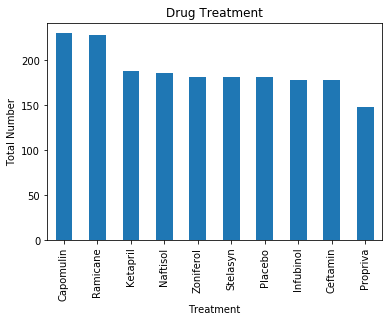

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
count=cleandata["Drug Regimen"].value_counts()
count.plot(kind="bar")
plt.xlabel('Treatment')
plt.ylabel('Total Number')
plt.title("Drug Treatment")
plt.show()

In [ ]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
count=cleandata["Drug Regimen"].value_counts()
plt.bar(count.index.values,count.values)
plt.xticks(rotation=90)
plt.xlabel('Treatment')
plt.ylabel('Total Number')
plt.title("Drug Treatment")
plt.show()


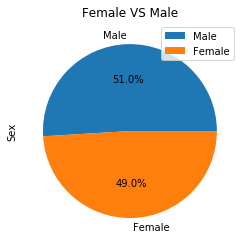

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
count=cleandata["Sex"].value_counts()
count.plot(kind="pie",autopct='%1.1f%%')
plt.title("Female VS Male")
plt.legend(loc="best")
plt.show()


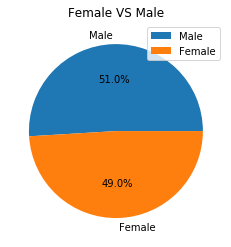

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
count=cleandata["Sex"].value_counts()
plt.pie(count.values,labels=count.index.values,autopct='%1.1f%%')
plt.title("Female VS Male")
plt.legend(loc='best')
plt.show()


## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
Max= cleandata.groupby("Mouse ID")["Timepoint"].max()
Max= Max.reset_index()
Max

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_data= Max.merge(cleandata,on=["Mouse ID","Timepoint"],how="left")
merge_data


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [13]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)

tumordata=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list: 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_volumes= merge_data.loc[merge_data["Drug Regimen"]== drug,"Tumor Volume (mm3)" ]
    
    # add subset 
    tumordata.append(final_volumes)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_volumes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_volumes.loc[(final_volumes < lower_bound) | (final_volumes > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


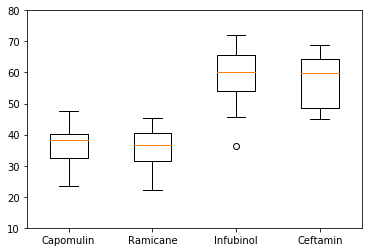

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
top_4 = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

best_regimes = cleandata[cleandata["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
best_regimes = best_regimes.sort_values(["Timepoint"], ascending=True)
best_regimes

best_regimes_data = best_regimes[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

best_regimes_data
best_regimens_sort = best_regimes_data.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
best_regimens_sort.head()

best_regimen_df = best_regimens_sort.to_frame()
best_regimen_df

final_df = best_regimen_df.reset_index()
tumor_lists = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df = tumor_list_df.reindex(top_4)
tumor_vols = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_vols, labels=top_4)
plt.ylim(10, 80)
plt.show()

## Line and Scatter Plots

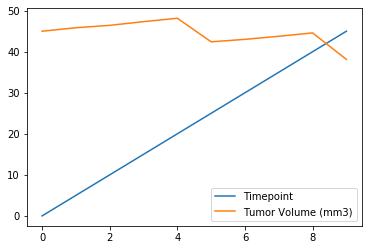

In [27]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
time_vs_tumer = cleandata[cleandata["Mouse ID"].isin(["j119"])]
time_vs_tumer

time_vs_tumer_data = time_vs_tumer[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
time_vs_tumer_data

line_plot_df = time_vs_tumer_data.reset_index()
line_plot_df

line_plot_final = line_plot_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
line_plot_final

lines = line_plot_final.plot.line()

tumorvolume_list = line_plot_final['Tumor Volume (mm3)'].tolist()
timepoint_list = line_plot_final['Timepoint'].tolist()

ValueError: x and y must be the same size

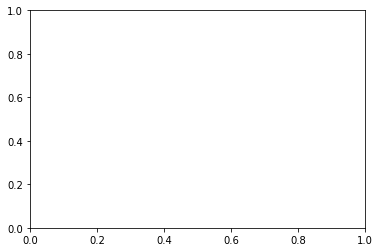

In [51]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin_scatter = cleandata[cleandata["Drug Regimen"].isin(["Capomulin"])]

capomulin_scatter_df = capomulin_scatter[["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]

capomulin_scatter_plot = capomulin_scatter_df.reset_index()

capomulin_sorted = capomulin_scatter_plot.sort_values(["Weight (g)"], ascending=True)

capomulin_grouped_weight = capomulin_scatter_plot.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()

plt.scatter(capomulin_sorted, capomulin_grouped_weight, marker="o", facecolors="red", edgecolors="black")

plt.show()


## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.59
y = 1.33x + 16.25
slope:1.3322996070684112
intercept:16.24834358087913
rvalue (Correlation coefficient):0.5881275121987511
pandas (Correlation coefficient):0.59
stderr:0.04227724572365242


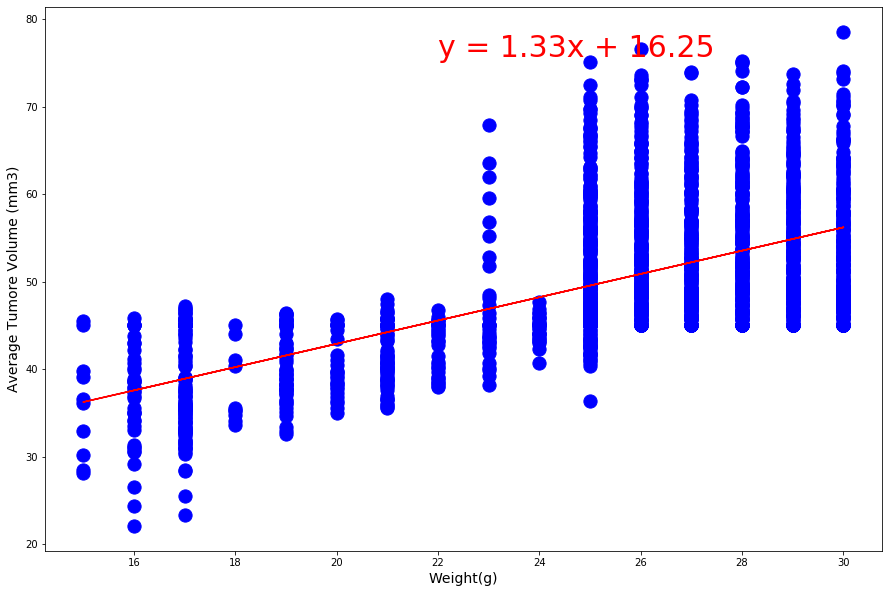

In [45]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(cleandata['Weight (g)'],cleandata['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

x_values = cleandata['Weight (g)']
y_values = cleandata['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{corr}")
print(f"stderr:{stderr}")

fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.scatter(x_values,y_values,s=175, color="blue")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Weight(g)',fontsize =14)
plt.ylabel('Average Tumore Volume (mm3)',fontsize =14)
ax1.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.95), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=30,color="red")
plt.savefig("Images/linear_regression.png", bbox_inches = "tight")
plt.show()